In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
lr = LinearRegression()
lr.fit([[0,0], [1,1], [2,2]], [0,1,2])

LinearRegression()

In [4]:
lr.coef_

array([0.5, 0.5])

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [40]:

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


In [41]:

# Create linear regression object
regr = LinearRegression()


In [42]:

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression()

In [43]:

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [44]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


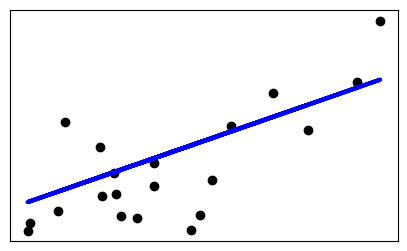

In [49]:
# Plot outputs
plt.figure(figsize=(5,3))
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [56]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [55]:
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)
print(y[:10])
# Add some noise
y += 5 * np.random.normal(size=(n_samples,))
print(y[:10])
print(true_coef)
print(X)

[ -2.88045444   8.80952654   7.03475169  -8.99813711  28.4772444
   9.30957584 -10.04686457   1.47355524   1.10906887 -11.83766393]
[-11.73993785  11.99387733   3.67967746 -14.47733292  22.95498526
  11.47728389 -11.1597392   -6.93628868   3.49925795 -19.03570458]
[0.         0.         0.         0.33125414 3.59153559 0.
 3.00246149 0.         0.         2.45578386 2.76580913 2.55422981
 0.         0.         2.46896578 0.12462552 0.         1.37495382
 0.         5.38357455 4.63452439 1.81229228 4.08302011 0.19437405
 2.29631248 4.43316089 0.73649605 0.         0.         0.
 2.47026955 2.83690028 1.5130952  0.         0.         0.
 0.         0.         1.85566907 5.95702923 0.37058761 0.
 0.         0.3731543  0.         0.36059568 1.35243701 0.62905819
 1.3726258  1.30124283]
[[ 0.49671415 -0.1382643   0.64768854 ...  1.05712223  0.34361829
  -1.76304016]
 [ 0.32408397 -0.38508228 -0.676922   ...  0.26105527  0.00511346
  -0.23458713]
 [-1.41537074 -0.42064532 -0.34271452 ... -1.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [58]:
reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.8225220806196525


In [62]:

reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.7436926291700354


Text(0, 0.5, 'NNLS regression coefficients')

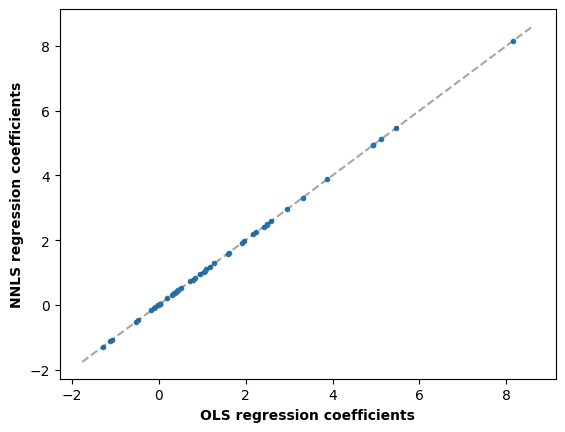

In [63]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

In [71]:
from sklearn import linear_model
lr = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
lr.fit([[0,0],[0,0],[1,1]],[0,.1,1])


RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

In [72]:
lr.alpha_

0.01

In [1]:
l1 = [[1,4,2,5,2,7,3,6,3,6,8,9,0,3,5,3],
      [7,8,1,2,1,4,3,2,5,6,7,8,4,3,2,4],
      [7,5,1,7,5,4,8,7,9,3,2,3,6,8,2,9],
      [3,5,6,2,1,8,9,6,7,4,3,0,2,8,8,0],
      [2,1,0,7,5,4,8,7,9,3,2,3,6,8,2,9],
      [6,8,7,3,5,4,8,7,6,8,7,3,7,9,3,2],
      [2,6,0,0,5,4,8,7,9,3,2,3,6,8,2,9],
      [9,6,4,6,5,4,8,7,9,3,2,3,6,8,2,9],
      [0,0,6,0,5,4,8,6,8,7,3,5,7,9,3,2],
      [5,8,4,7,5,6,8,7,8,2,2,3,6,8,2,9],
      [4,6,5,8,5,4,8,7,9,3,2,3,6,8,2,9],
      [9,2,2,1,5,4,8,7,9,3,6,8,7,3,5,9],
      [8,7,8,2,5,4,8,7,9,3,2,7,9,3,2,9],
      [1,8,0,4,5,4,6,8,7,3,5,3,6,8,2,9],
      [9,1,3,9,5,4,8,7,9,3,2,3,6,8,2,9],
      [6,8,1,5,9,2,0,3,1,4,7,3,9,0,2,6]]
o = [0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0]
len(o)

16

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
np.ndim(l1)

NameError: name 'np' is not defined

In [ ]:
np.ndim(l1)

2

In [224]:
l1_train, l1_test, o_train, o_test = train_test_split(l1, o, test_size=0.2, random_state=123)

In [225]:
svm = SVC(kernel='poly')
svm.fit(l1_train, o_train)

SVC(kernel='poly')

In [226]:
pre = svm.predict(l1_test)
pre

array([1, 0, 1, 0])

In [227]:
o_test

[0, 1, 0, 0]

In [190]:
print(classification_report(pre, o_test))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



In [191]:
confusion_matrix(pre, o_test)

array([[1, 1],
       [2, 0]])

In [192]:
accuracy_score(pre, o_test)

0.25

In [193]:
f1_score(pre, o_test)

0.0

In [194]:
from sklearn.linear_model import LogisticRegression

In [195]:
log = LogisticRegression()
log.fit(l1_train, o_train)
pred = log.predict(l1_test)
pred

array([1, 1, 1, 0])

In [196]:
print(classification_report(pred, o_test))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [198]:
accuracy_score(pred, o_test)

0.5

In [209]:
np.dot([1,2,3], np.array([4,5,6]))

32

In [234]:
def my_kernal(X, y):
    return np.dot(X, np.array(y).T)

In [235]:
my_kernal([1,2,3], [4,5,6])

32

In [236]:
svm = SVC(kernel = my_kernal)

In [237]:
len(l1_train)

12

In [238]:
len(o_train)

12

In [239]:
svm.fit(l1_train, o_train)

SVC(kernel=<function my_kernal at 0x7f7d79a00c10>)

In [242]:
accuracy_score(svm.predict(l1_test), o_test)

0.5

In [243]:
confusion_matrix(svm.predict(l1_test), o_test)

array([[1, 0],
       [2, 1]])

In [244]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [248]:
# Create the two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X,y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                centers=centers,
                cluster_std=clusters_std,
                random_state=0,
                shuffle=False)
print(X)

[[ 2.64607852  0.60023581]
 [ 1.46810698  3.3613398 ]
 [ 2.80133699 -1.46591682]
 ...
 [ 1.68550965  2.53503626]
 [ 1.68945865  2.86728609]
 [ 1.45085528  2.28630668]]


In [250]:
print(y)

[0 0 0 ... 1 1 1]


In [252]:
# fit the model and get the separating hyperplane
clf = SVC(kernel="linear", C=1.0)
clf.fit(X, y)

SVC(kernel='linear')

In [253]:
# fit the model and get the separating hyperplane using weighted classes
wclf = SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)


SVC(class_weight={1: 10}, kernel='linear')

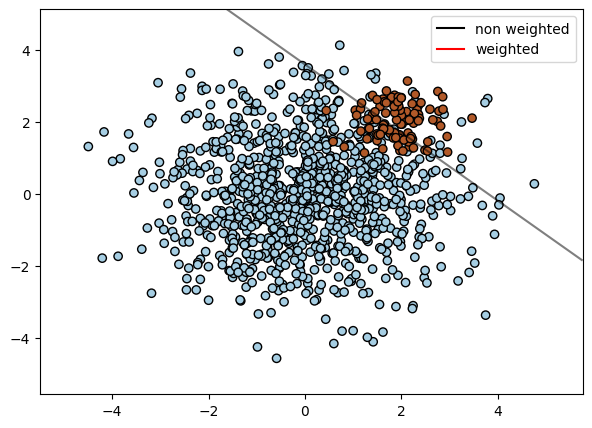

In [262]:
# plot the samples
plt.figure(figsize = (7,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(clf,X,plot_method="contour",colors="k",
                                              levels=[0],alpha=0.5,linestyles=["-"],
                                              ax=ax)

plt.legend([mlines.Line2D([], [], color="k", label="non weighted"),
            mlines.Line2D([], [], color="r", label="weighted"),],
            ["non weighted", "weighted"],loc="upper right")
plt.show()

## Ensemble techniques

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [5]:
X, y = make_hastie_10_2(random_state=1)

In [6]:
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [7]:
hgbc = HistGradientBoostingClassifier(max_iter=100, max_depth=10, 
                                      max_leaf_nodes=20, max_bins=200,
                                      min_samples_leaf=1)
hgbc.fit(X_train, y_train)

HistGradientBoostingClassifier(max_bins=200, max_depth=10, max_leaf_nodes=20,
                               min_samples_leaf=1)

In [8]:
pre = hgbc.predict(X_test)
print(classification_report(pre, y_test))

              precision    recall  f1-score   support

        -1.0       0.89      0.90      0.89      5014
         1.0       0.90      0.89      0.89      4986

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [9]:
accuracy_score(pre, y_test)

0.8936

In [10]:
confusion_matrix(pre, y_test)

array([[4498,  516],
       [ 548, 4438]])

In [11]:
hgbc.score(X_test, y_test)

0.8936

In [12]:
hgbc.score(X_train, y_train)

1.0

In [13]:
print(hgbc.n_trees_per_iteration_)

1


In [14]:
x = np.array([0,1,2,np.nan]).reshape(-1,1)
y = [0,0,1,1]

In [15]:
histgb = HistGradientBoostingClassifier(min_samples_leaf=1)
histgb.fit(x,y)
histgb.predict(x)

array([0, 0, 1, 1])

In [16]:
X = np.array([0, np.nan, 1,2,np.nan]).reshape(-1, 1)
y = [0,1,0,0,1]

In [17]:
model = HistGradientBoostingClassifier(min_samples_leaf=1, max_depth=2, learning_rate=1, max_iter=1)
model.fit(X,y)

HistGradientBoostingClassifier(learning_rate=1, max_depth=2, max_iter=1,
                               min_samples_leaf=1)

In [18]:
model.predict(X)

array([0, 1, 0, 0, 1])

In [19]:
x = [[1,0],[1,0],[1,0],[0,1]]
y = [0,0,1,0]
sample_weight = [0,0,1,1]

In [20]:
model = HistGradientBoostingClassifier(min_samples_leaf=1)
model.fit(x,y,sample_weight=sample_weight)

HistGradientBoostingClassifier(min_samples_leaf=1)

In [21]:
model.predict(x)

array([1, 1, 1, 0])

In [22]:
model.predict_proba(x)

array([[9.79080976e-04, 9.99020919e-01],
       [9.79080976e-04, 9.99020919e-01],
       [9.79080976e-04, 9.99020919e-01],
       [9.99020919e-01, 9.79080976e-04]])

In [23]:
model.predict([[1,0]])

array([1])

In [24]:
model.predict_proba([[1,0]])[0,1]

0.9990209190235209

In [25]:
gbdt = HistGradientBoostingClassifier(monotonic_cst=[1, -1, 0])


In [26]:
from sklearn.datasets import load_breast_cancer

In [27]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.956140350877193

In [32]:
confusion_matrix(pred, y_test)

array([[37,  0],
       [ 5, 72]])

In [33]:
accuracy_score(y_test, pred)

0.956140350877193

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [35]:
RandomForestClassifier()

RandomForestClassifier()

In [36]:
grid = GridSearchCV(estimator=rfc, 
                    param_grid={"n_estimators":[100,200,300,400,500],
                                "criterion": ['gini', 'entropy', 'log_loss'],
                                "max_features": [10,50,100,200]}, cv = 5)

In [37]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [10, 50, 100, 200],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [38]:
grid.best_params_

{'criterion': 'log_loss', 'max_features': 10, 'n_estimators': 200}

In [39]:
pre = grid.predict(X_test)
accuracy_score(pre, y_test)

0.956140350877193

In [40]:
print(classification_report(pre, y_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        37
           1       1.00      0.94      0.97        77

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



In [41]:
print(classification_report(rfc.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        37
           1       1.00      0.94      0.97        77

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



In [42]:
confusion_matrix(pre, y_test)

array([[37,  0],
       [ 5, 72]])

In [43]:
confusion_matrix(rfc.predict(X_test), y_test)

array([[37,  0],
       [ 5, 72]])

In [80]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

# Create the data
X = np.random.rand(100, 2)
y = np.random.randint(0, 2, 100)

# Create the random forest
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X, y)



RandomForestClassifier(n_estimators=5)

In [85]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [88]:
import keras
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions


In [90]:
model = ResNet50(weights='imagenet')